### PREETHI R.M

### WorkFormHome

In [3]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\preet\appdata\local\temp\pip-req-build-qz1b_7db


  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\preet\AppData\Local\Temp\pip-req-build-qz1b_7db'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\preet\AppData\Local\Temp\pip-req-build-qz1b_7db'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


### Importing Necessary libraries

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

### Collecting data using Data Scraping From Twitter

In [4]:
hashtags = '"#Workfromhome" since:2019-1-12 until:2022-2-11 near:India'

limit = 20000

list_data = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(hashtags).get_items()):
    if i>limit:
        break
    list_data.append([tweet.date, tweet.id, tweet.content, tweet.user.username,tweet.user.location,tweet.hashtags,tweet.place])

In [5]:
data = pd.DataFrame(list_data, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'location','hashtags','place'])
data

Datetime             Tweet Id  \
0    2022-02-10 05:29:12+00:00  1491645406282870786   
1    2022-02-09 03:31:48+00:00  1491253469810151433   
2    2022-02-08 23:55:24+00:00  1491199014364389377   
3    2022-02-08 09:36:05+00:00  1490982758918721538   
4    2022-02-07 14:07:03+00:00  1490688561699758081   
...                        ...                  ...   
9952 2019-01-22 03:22:49+00:00  1087551126889791493   
9953 2019-01-18 22:29:17+00:00  1086390095614222337   
9954 2019-01-16 14:26:22+00:00  1085543791161954307   
9955 2019-01-14 10:35:50+00:00  1084760996340625408   
9956 2019-01-13 04:02:09+00:00  1084299535675998208   

                                                   Text         Username  \
0     Hard work 🌟\n#motivation #Workfromhome #opport...  Prajapa83730199   
1     For a sleep lover, who can fall asleep anytime...     M0therOfGods   
2     Good morning! Our day depends on how we start ...         ErryZach   
3     #BREAKING : COVID19 Third wave has ended in #T...  ArbaazTheGreat1   
4     #hikvision #dahua #ezviz #uniview #corronaviru...       rohanbadri   
...                                                 ...              ...   
9952  I hope everyone decides to #WorkFromHome Have ...     Jasbirtweets   
9953  https://t.co/AM3k3k6SIW \n#money #jobseekers #...   singwithchetan   
9954  Fun Jump ! #fun #childhood #WorkFromHome #funa...       muneerahmd   
9955  To Know How \nFix Appointment and Meet Me in M...        zohaibflp   
9956  Ready for Day 2 Of Spectacular 2019 with fresh...  Kartikpatel1988   

                      location  \
0        Ahmadabad City, India   
1     the city of two wheelers   
2           Petaling, Selangor   
3             Hyderabad, India   
4               Surat, Gujarat   
...                        ...   
9952            Gurgaon, India   
9953      Greater Noida, India   
9954      United Arab Emirates   
9955                    Mumbai   
9956     Ahmadabad City, India   

                                               hashtags  \
0     [motivation, Workfromhome, opportunity, Days, ...   
1                                        [workfromhome]   
2                                        [Workfromhome]   
3          [BREAKING, Telangana, WorkFromHome, COVID19]   
4     [hikvision, dahua, ezviz, uniview, corronaviru...   
...                                                 ...   
9952                         [WorkFromHome, WetTuesday]   
9953  [money, jobseekers, WorkFromHome, daily1hour, ...   
9954  [fun, childhood, WorkFromHome, funatwork, jump...   
9955  [business, opportunity, mumbai, workfromhome, ...   
9956  [HERBALIFENUTRITION, FITENTERPRENURE, workfrom...   

                                                  place  
0     Place(fullName='Kankaria Lake', name='Kankaria...  
1     Place(fullName='Pune, India', name='Pune', typ...  
2     Place(fullName='Damansara, Selangor', name='Da...  
3     Place(fullName='Hyderabad, India', name='Hyder...  
4     Place(fullName='Comp India', name='Comp India'...  
...                                                 ...  
9952  Place(fullName='Gurgaon, India', name='Gurgaon...  
9953  Place(fullName='India', name='India', type='co...  
9954  Place(fullName='Abu Dhabi, United Arab Emirate...  
9955  Place(fullName='Mumbai, India', name='Mumbai',...  
9956  Place(fullName='Sanganer, India', name='Sangan...  

[9957 rows x 7 columns]

### Data Cleaning

In [6]:
df=data.dropna().reset_index(drop=False)

In [7]:
df.isnull().sum()

index       0
Datetime    0
Tweet Id    0
Text        0
Username    0
location    0
hashtags    0
place       0
dtype: int64

In [8]:
df

index                  Datetime             Tweet Id  \
0         0 2022-02-10 05:29:12+00:00  1491645406282870786   
1         1 2022-02-09 03:31:48+00:00  1491253469810151433   
2         2 2022-02-08 23:55:24+00:00  1491199014364389377   
3         3 2022-02-08 09:36:05+00:00  1490982758918721538   
4         4 2022-02-07 14:07:03+00:00  1490688561699758081   
...     ...                       ...                  ...   
9940   9952 2019-01-22 03:22:49+00:00  1087551126889791493   
9941   9953 2019-01-18 22:29:17+00:00  1086390095614222337   
9942   9954 2019-01-16 14:26:22+00:00  1085543791161954307   
9943   9955 2019-01-14 10:35:50+00:00  1084760996340625408   
9944   9956 2019-01-13 04:02:09+00:00  1084299535675998208   

                                                   Text         Username  \
0     Hard work 🌟\n#motivation #Workfromhome #opport...  Prajapa83730199   
1     For a sleep lover, who can fall asleep anytime...     M0therOfGods   
2     Good morning! Our day depends on how we start ...         ErryZach   
3     #BREAKING : COVID19 Third wave has ended in #T...  ArbaazTheGreat1   
4     #hikvision #dahua #ezviz #uniview #corronaviru...       rohanbadri   
...                                                 ...              ...   
9940  I hope everyone decides to #WorkFromHome Have ...     Jasbirtweets   
9941  https://t.co/AM3k3k6SIW \n#money #jobseekers #...   singwithchetan   
9942  Fun Jump ! #fun #childhood #WorkFromHome #funa...       muneerahmd   
9943  To Know How \nFix Appointment and Meet Me in M...        zohaibflp   
9944  Ready for Day 2 Of Spectacular 2019 with fresh...  Kartikpatel1988   

                      location  \
0        Ahmadabad City, India   
1     the city of two wheelers   
2           Petaling, Selangor   
3             Hyderabad, India   
4               Surat, Gujarat   
...                        ...   
9940            Gurgaon, India   
9941      Greater Noida, India   
9942      United Arab Emirates   
9943                    Mumbai   
9944     Ahmadabad City, India   

                                               hashtags  \
0     [motivation, Workfromhome, opportunity, Days, ...   
1                                        [workfromhome]   
2                                        [Workfromhome]   
3          [BREAKING, Telangana, WorkFromHome, COVID19]   
4     [hikvision, dahua, ezviz, uniview, corronaviru...   
...                                                 ...   
9940                         [WorkFromHome, WetTuesday]   
9941  [money, jobseekers, WorkFromHome, daily1hour, ...   
9942  [fun, childhood, WorkFromHome, funatwork, jump...   
9943  [business, opportunity, mumbai, workfromhome, ...   
9944  [HERBALIFENUTRITION, FITENTERPRENURE, workfrom...   

                                                  place  
0     Place(fullName='Kankaria Lake', name='Kankaria...  
1     Place(fullName='Pune, India', name='Pune', typ...  
2     Place(fullName='Damansara, Selangor', name='Da...  
3     Place(fullName='Hyderabad, India', name='Hyder...  
4     Place(fullName='Comp India', name='Comp India'...  
...                                                 ...  
9940  Place(fullName='Gurgaon, India', name='Gurgaon...  
9941  Place(fullName='India', name='India', type='co...  
9942  Place(fullName='Abu Dhabi, United Arab Emirate...  
9943  Place(fullName='Mumbai, India', name='Mumbai',...  
9944  Place(fullName='Sanganer, India', name='Sangan...  

[9945 rows x 8 columns]

### Frequency Chart for most commonly used hashtags in the tweets related to WorkFromHome

In [9]:
hash=[]
for i in range(9930):
    for j in range(len(df['hashtags'][i])):
        hash.append(df['hashtags'][i][j])

In [10]:
for i in range(len(hash)):
    hash[i] = hash[i].lower()

In [11]:
hash=np.array(hash)
(unique,count)=np.unique(hash,return_counts=True)
data_hash=pd.DataFrame({'hashtag':unique,'frequency':count})

In [12]:
df_sort=data_hash.sort_values('frequency',ascending=False)

In [13]:
px.bar(x = df_sort['hashtag'][0:30], y = df_sort['frequency'][0:30],color=df_sort["hashtag"][0:30], color_discrete_sequence=["coral", "greenyellow", "crimson", "coral", "crimson","crimson", "greenyellow", "crimson", "greenyellow", "coral","crimson", "greenyellow", "crimson", "crimson", "orange","chocolate", "coral", "coral", "chocolate", "chocolate","greenyellow", "chocolate", "chocolate", "greenyellow", "coral","greenyellow", "greenyellow", "greenyellow", "greenyellow", "greenyellow"],opacity=0.8)


**Conclusion:**
- The above Plots shows the frequently occured hashtags.
- Here, The hashtag workfromhome has been talked about the most compared to others.
- And the second and third most used hashtags are covid19 and stayhome.
- The hashtag workfromhome has been widely spread around the world due to covid 19 pandemic and it has led people to stay at home.

### Sentimental Analysis 

In [12]:
df['Text'] =df['Text'].str.replace('\d+','')
df['Text'] =df['Text'].str.replace('.','')
def remove_pattern(input_txt):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt))
    r = re.findall(r"@(w+)", str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)      
    return input_txt
df['@_remove'] = np.vectorize(remove_pattern)(df['Text'])
df['@_remove'][:3]

def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text=re.sub(r'#','',str(text))
    text = re.sub('http[^\s]+','',str(text))
    text=re.sub(r'@[A-Za-z0-9]+','',str(text))
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

df['Text']=df['Text'].apply(cleanTxt)

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return "positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "negative"
    else :
        return "neutral"

l=[sentiment_scores(i) for i in df.Text]
df["labels"] = l

In [13]:
df['Month']=df['Datetime'].dt.to_period('M').astype(str)
df['Year']=df['Datetime'].dt.year
df['Week']=df['Datetime'].dt.to_period('W').astype(str)

### Number of tweets over a period of time - Month wise from the year of 2019-2022

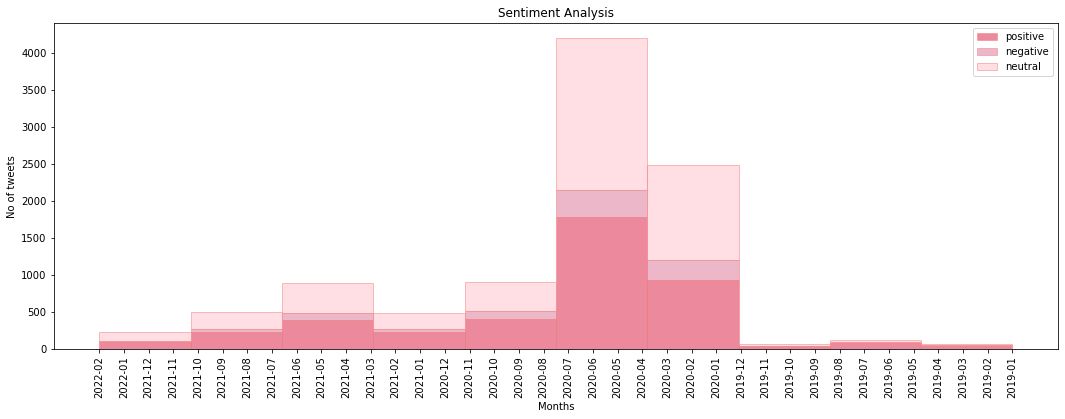

In [14]:
fig,ax=plt.subplots(figsize=(18,6))

pos_df = df["Month"][df["labels"] == "positive"]
neg_df = df["Month"][df["labels"] == "negative"]
neu_df = df["Month"][df["labels"] == "neutral"]
plt.hist([pos_df, neg_df,neu_df],stacked=True,label=["positive", "negative", "neutral"],color=['Crimson','Palevioletred','pink'],alpha=0.5,edgecolor='lightcoral')
plt.legend()
plt.title("Sentiment Analysis")
plt.xlabel("Months")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()

**Conclusion:**
- We can observe that people feel more positive and negitive about the workfromhome between the time period 2019-2020

In [16]:
# df['Datetime']=pd.to_datetime(df['Datetime'])
# df['Week']=df['Datetime'].dt.to_period('W').astype(str)

### Number of tweets over a period of time - week wise from the year of 2019-2022

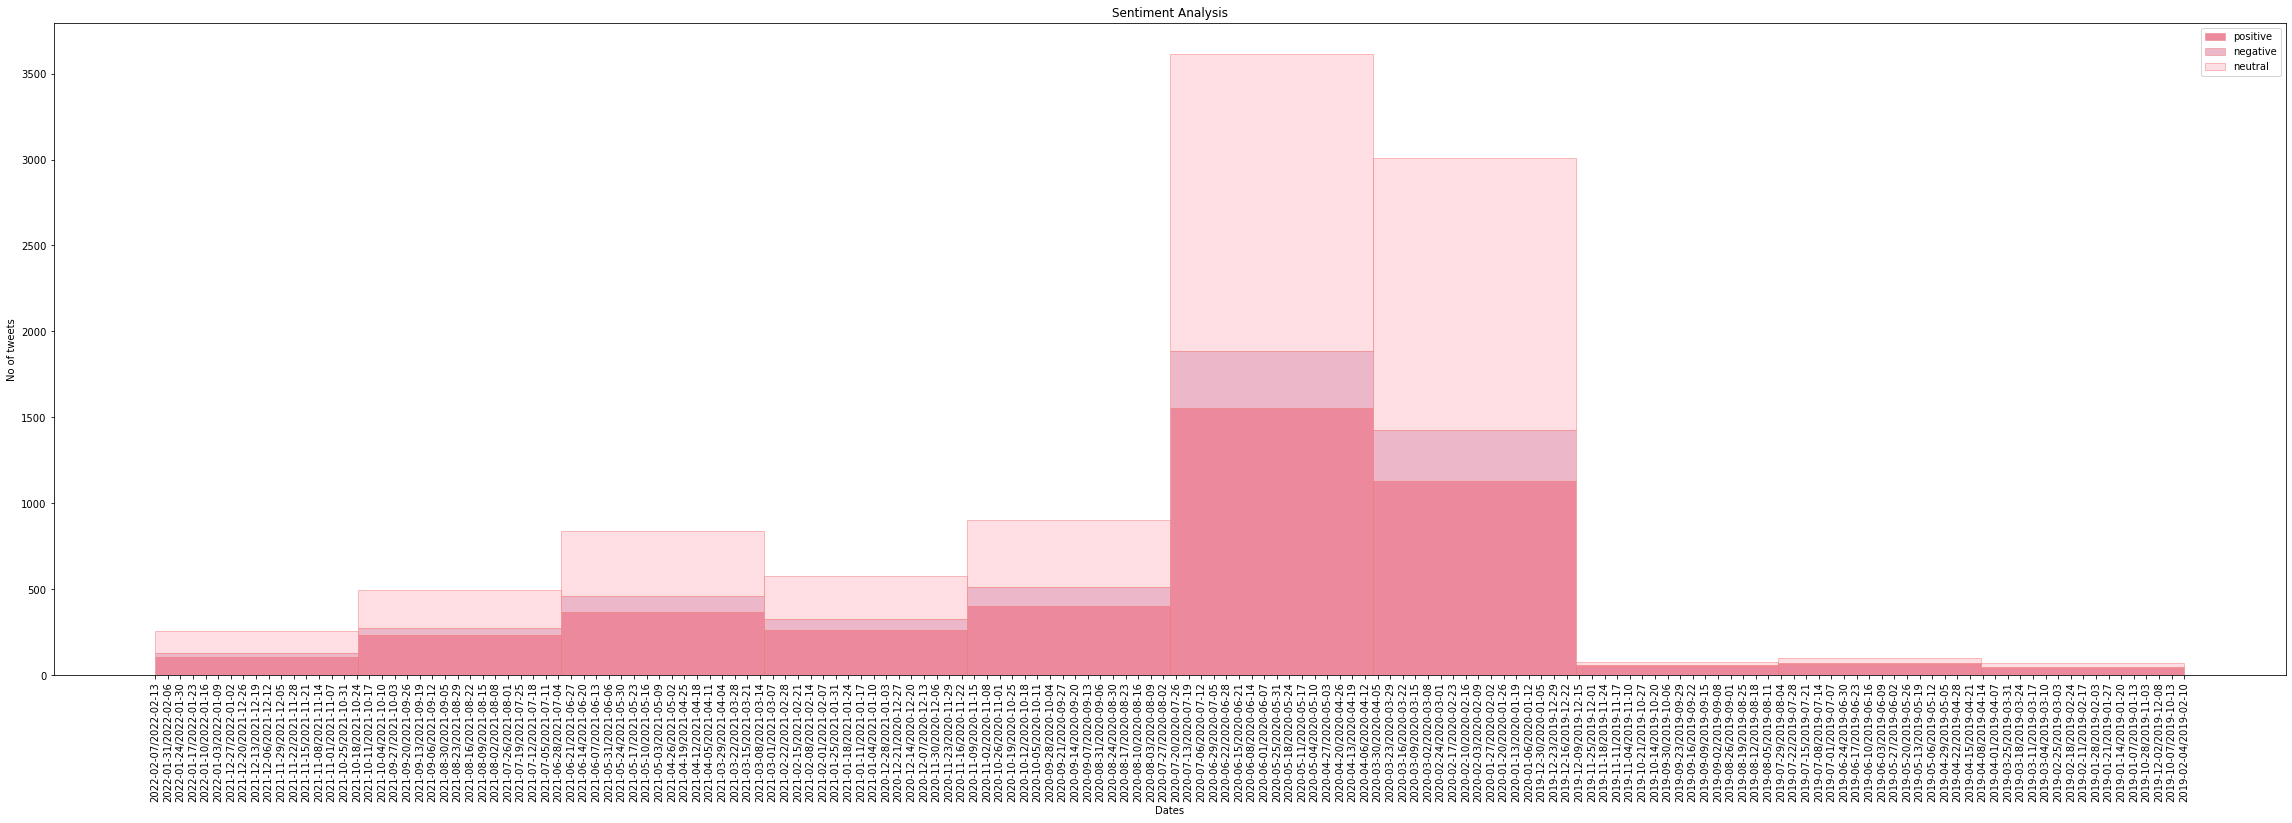

In [16]:
#Weekly
fig,ax=plt.subplots(figsize=(40,12))

pos_df = df["Week"][df["labels"] == "positive"]
neg_df = df["Week"][df["labels"] == "negative"]
neu_df = df["Week"][df["labels"] == "neutral"]
plt.hist([pos_df, neg_df,neu_df],stacked=True,label=["positive", "negative", "neutral"],color=['Crimson','Palevioletred','pink'],alpha=0.5,edgecolor='lightcoral')
plt.legend()
plt.title("Sentiment Analysis")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()

**Conclusion:**
- We can observe that people feel more positive and negitive about the workfromhome between the time period 2019-2020

### Donut chart for Sentiment Analysis

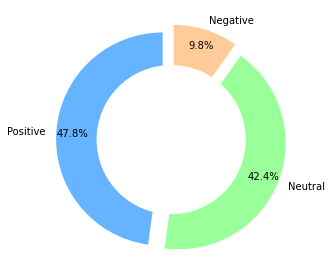

In [17]:
colors = ['#66b3ff','#99ff99','#ffcc99']
explode = (0.08,0.08,0.08)
 
plt.pie(df.labels.value_counts(),colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,labels=['Positive','Neutral','Negative'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

**Conclusion:**
- By Doing sentiment analysis for workfromhome, we can observe that workfromhome has a positive feeling among people.
- However there are some negitive reviews because working from home doesn't suit everyone. 

### Line chart for total no of positive, negative, neutral tweets

In [18]:
positive=df[df['labels']=='positive']
pos19=len(positive[positive['Year']== 2019])
pos20=len(positive[positive['Year']== 2020])
pos21=len(positive[positive['Year']== 2021])
pos22=len(positive[positive['Year']== 2022])

negative=df[df['labels']=='negative']
neg19=len(negative[negative['Year']== 2019])
neg20=len(negative[negative['Year']== 2020])
neg21=len(negative[negative['Year']== 2021])
neg22=len(negative[negative['Year']== 2021])

neutral=df[df['labels']=='neutral']
nu19=len(neutral[neutral['Year']== 2019])
nu20=len(neutral[neutral['Year']== 2020])
nu21=len(neutral[neutral['Year']== 2021])
nu22=len(neutral[neutral['Year']== 2021])

In [19]:
year=['2019','2020','2021','2022']
pos=[pos19,pos20,pos21,pos22]
neg=[neg19,neg20,neg21,neg22]
neu=[nu19,nu20,nu21,nu22]

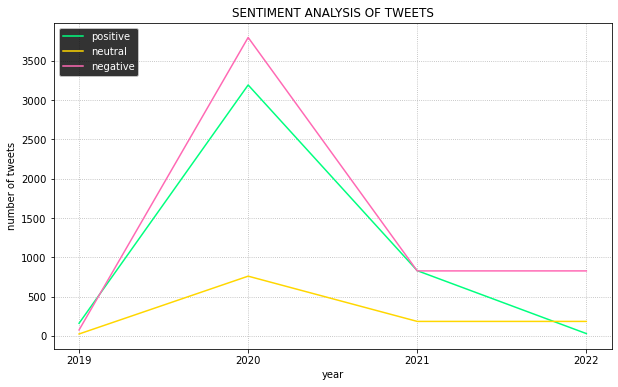

In [20]:
plt.figure(figsize=(10,6))
plt.plot(year,pos,'springgreen',label='positive')
plt.plot(year,neg,'gold',label='neutral')
plt.plot(year,neu,'hotpink',label='negative')
plt.grid(True,linestyle=':')
plt.xlabel('year')
plt.ylabel('number of tweets')
plt.title('SENTIMENT ANALYSIS OF TWEETS')
plt.style.use('dark_background')
plt.legend(loc=2);
plt.show()

**Conclusion:**
-

## Word cloud 

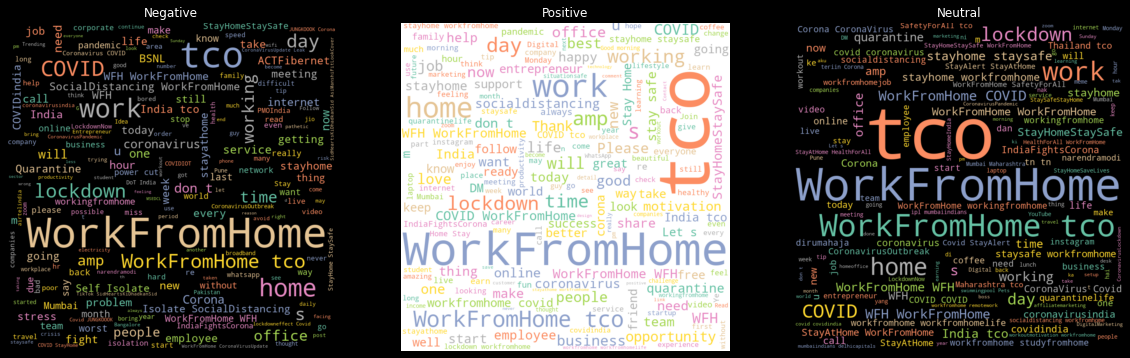

In [22]:
comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=df[df['labels']=='negative']
p=df[df['labels']=='positive']
ne=df[df['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

In [ ]:
**Conclusion:**
- 

In [24]:
#three periods 
mar20_dec20 = (df['Month'] > '2020-03') & (df['Month'] <= '2020-12')
jan21_dec21 = (df['Month'] > '2021-01') & (df['Month'] <= '2021-12')
jan22_feb22 = (df['Month'] > '2022-01') & (df['Month'] <= '2022-02')

In [25]:
jan20=df.loc[mar20_dec20].reset_index(drop=False)
jan21=df.loc[jan21_dec21].reset_index(drop=False)
jan22=df.loc[jan22_feb22].reset_index(drop=False)

### Word cloud for the period of Mar - Dec(2020)

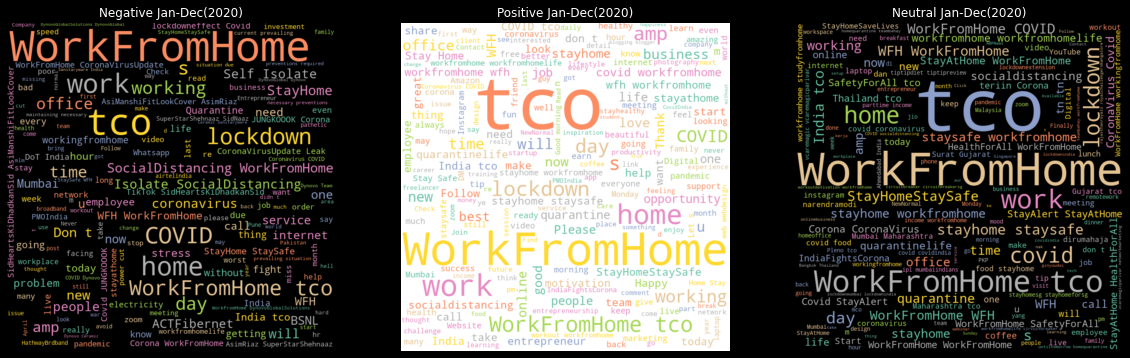

In [26]:
comment_words3 = ''
comment_words4 = ''
comment_words5 = ''
stopwords = set(STOPWORDS)
n=jan20[jan20['labels']=='negative']
p=jan20[jan20['labels']=='positive']
ne=jan20[jan20['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words3 += " ".join(tokens)+" "
 
wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words3)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words4 += " ".join(tokens)+" "
 
wordcloud4 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words4)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words5 += " ".join(tokens)+" "
 
wordcloud5 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words5)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud3, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Jan-Dec(2020)')

ax2.imshow(wordcloud4, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Jan-Dec(2020)')
  
ax3.imshow(wordcloud5, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral Jan-Dec(2020)')
     
plt.show()

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text1 = ' '.join([word for word in comment_words3.split() if word not in (stopwords.words('english'))])
text2 = ' '.join([word for word in comment_words4.split() if word not in (stopwords.words('english'))])
text3 = ' '.join([word for word in comment_words5.split() if word not in (stopwords.words('english'))])
words1=text1.split()
words2=text2.split()
words3=text3.split()
print(len(words1))
print(len(words2))
print(len(words3))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


9150
46169
31689


In [29]:
word1=[]
for i in range(9150):
        word1.append(words1[i])
        
for i in range(len(word1)):
    word1[i] = word1[i].lower()
    
word2=[]
for i in range(46169):
        word2.append(words2[i])
        
for i in range(len(word2)):
    word2[i] = word2[i].lower()
    
word3=[]
for i in range(31689):
        word3.append(words3[i])
        
for i in range(len(word3)):
    word3[i] = word3[i].lower()
    
word1=np.array(word1)
word2=np.array(word2)
word3=np.array(word3)

(unique1,count1)=np.unique(word1,return_counts=True)
(unique2,count2)=np.unique(word2,return_counts=True)
(unique3,count3)=np.unique(word3,return_counts=True)

data_word1=pd.DataFrame({'words':unique1,'frequency':count1})
data_word2=pd.DataFrame({'words':unique2,'frequency':count2})
data_word3=pd.DataFrame({'words':unique3,'frequency':count3})

df_word_words1=data_word1.sort_values('frequency',ascending=False)
df_word_words2=data_word2.sort_values('frequency',ascending=False)
df_word_words3=data_word3.sort_values('frequency',ascending=False)

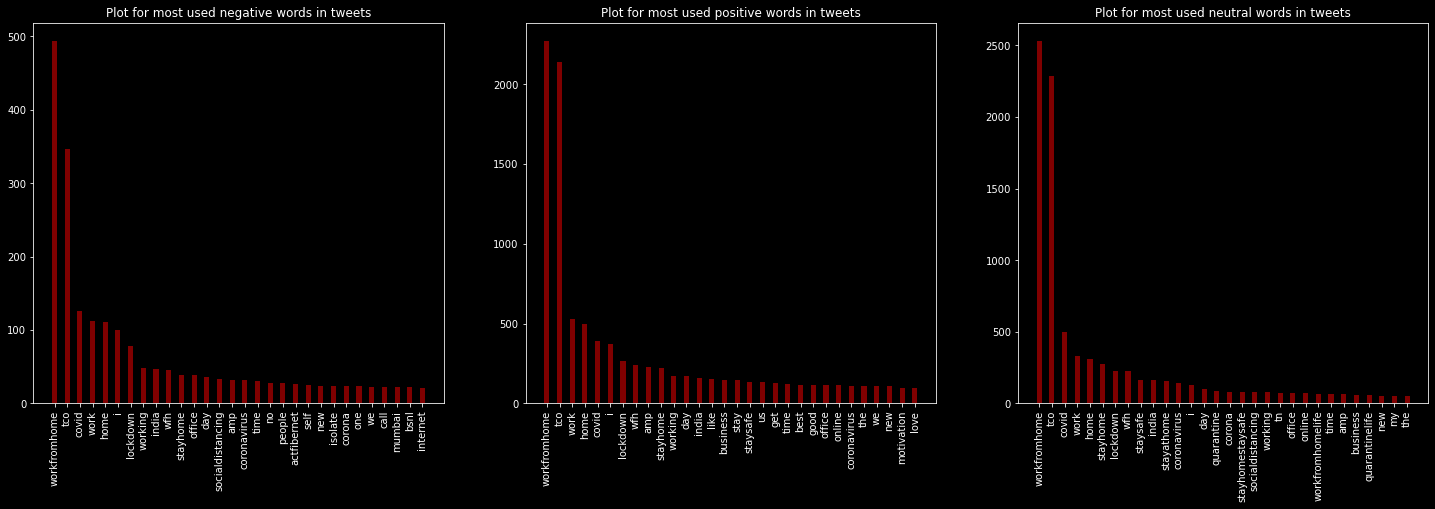

In [30]:
fig,(ax4,ax5,ax6)=plt.subplots(nrows=1,ncols=3,figsize=(25,7)) 
 
ax4.bar(df_word_words1['words'][0:30], df_word_words1['frequency'][0:30], color ='maroon',width = 0.4)
ax4.set_title('Plot for most used negative words in tweets')
ax4.set_xticklabels(df_word_words1['words'][0:30],rotation='vertical',size=10)


ax5.bar(df_word_words2['words'][0:30], df_word_words2['frequency'][0:30], color ='maroon',width = 0.4)
ax5.set_title('Plot for most used positive words in tweets')
ax5.set_xticklabels(df_word_words2['words'][0:30],rotation='vertical',size=10)


ax6.bar(df_word_words3['words'][0:30], df_word_words3['frequency'][0:30], color ='maroon',width = 0.4)
ax6.set_title('Plot for most used neutral words in tweets')
ax6.set_xticklabels(df_word_words3['words'][0:30],rotation='vertical',size=10)

plt.show()

### Word cloud for the period of Jan - Dec(2021)

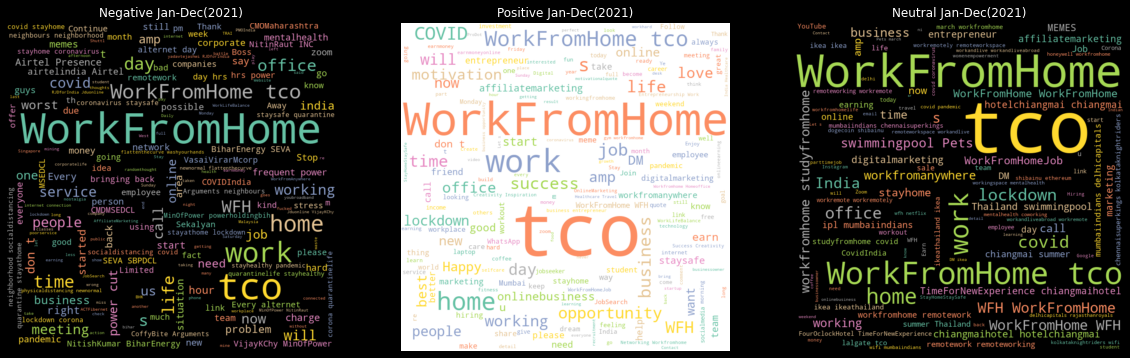

In [31]:
comment_words6 = ''
comment_words7 = ''
comment_words8 = ''
stopwords = set(STOPWORDS)
n=jan21[jan21['labels']=='negative']
p=jan21[jan21['labels']=='positive']
ne=jan21[jan21['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words6 += " ".join(tokens)+" "
 
wordcloud6 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words6)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words7 += " ".join(tokens)+" "
 
wordcloud7 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words7)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words8 += " ".join(tokens)+" "
 
wordcloud8 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words8)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud6, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Jan-Dec(2021)')

ax2.imshow(wordcloud7, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Jan-Dec(2021)')
  
ax3.imshow(wordcloud8, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral Jan-Dec(2021)')
     
plt.show()

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text4 = ' '.join([word for word in comment_words6.split() if word not in (stopwords.words('english'))])
text5 = ' '.join([word for word in comment_words7.split() if word not in (stopwords.words('english'))])
text6 = ' '.join([word for word in comment_words8.split() if word not in (stopwords.words('english'))])
words4=text4.split()
words5=text5.split()
words6=text6.split()
print(len(words4))
print(len(words5))
print(len(words6))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3101
14662
8896


In [34]:
word4=[]
for i in range(3101):
        word4.append(words4[i])
        
for i in range(len(word4)):
    word4[i] = word4[i].lower()
    
word5=[]
for i in range(14662):
        word5.append(words5[i])
        
for i in range(len(word5)):
    word5[i] = word5[i].lower()
    
word6=[]
for i in range(8896):
        word6.append(words6[i])
        
for i in range(len(word6)):
    word6[i] = word6[i].lower()
    
word4=np.array(word4)
word5=np.array(word5)
word6=np.array(word6)

(unique4,count4)=np.unique(word4,return_counts=True)
(unique5,count5)=np.unique(word5,return_counts=True)
(unique6,count6)=np.unique(word6,return_counts=True)

data_word4=pd.DataFrame({'words':unique4,'frequency':count4})
data_word5=pd.DataFrame({'words':unique5,'frequency':count5})
data_word6=pd.DataFrame({'words':unique6,'frequency':count6})

df_word_words4=data_word4.sort_values('frequency',ascending=False)
df_word_words5=data_word5.sort_values('frequency',ascending=False)
df_word_words6=data_word6.sort_values('frequency',ascending=False)

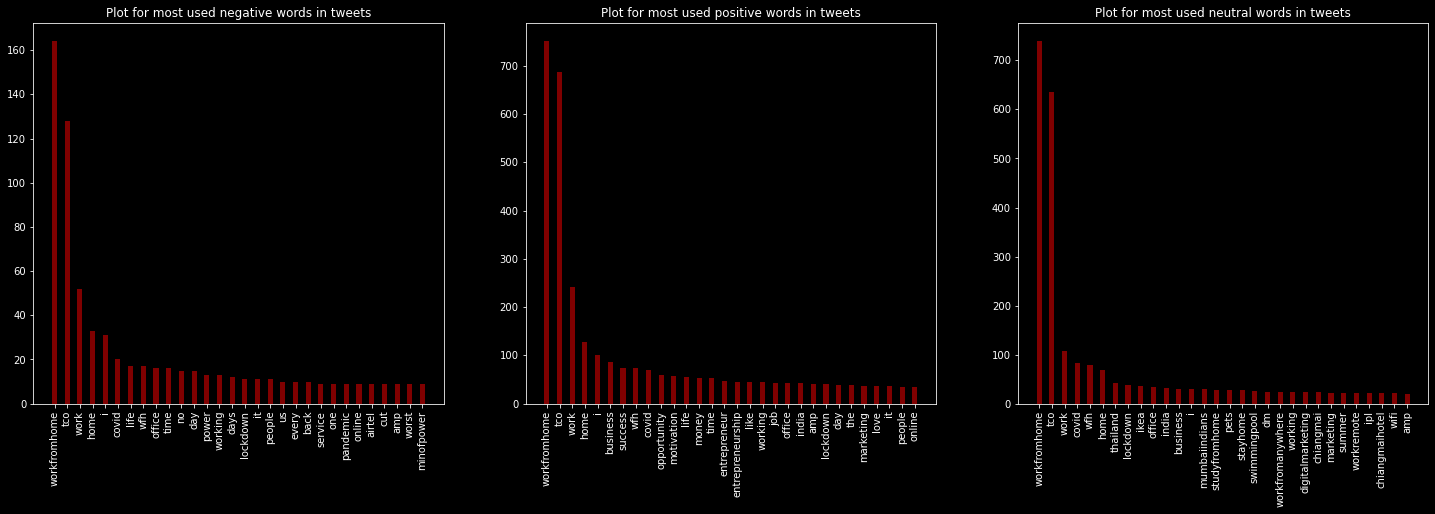

In [35]:
fig,(ax7,ax8,ax9)=plt.subplots(nrows=1,ncols=3,figsize=(25,7)) 
 
ax7.bar(df_word_words4['words'][0:30], df_word_words4['frequency'][0:30], color ='maroon',width = 0.4)
ax7.set_title('Plot for most used negative words in tweets')
ax7.set_xticklabels(df_word_words4['words'][0:30],rotation='vertical',size=10)


ax8.bar(df_word_words5['words'][0:30], df_word_words5['frequency'][0:30], color ='maroon',width = 0.4)
ax8.set_title('Plot for most used positive words in tweets')
ax8.set_xticklabels(df_word_words5['words'][0:30],rotation='vertical',size=10)


ax9.bar(df_word_words6['words'][0:30], df_word_words6['frequency'][0:30], color ='maroon',width = 0.4)
ax9.set_title('Plot for most used neutral words in tweets')
ax9.set_xticklabels(df_word_words6['words'][0:30],rotation='vertical',size=10)

plt.show()

### Word cloud for the period of jan - Feb(2022)

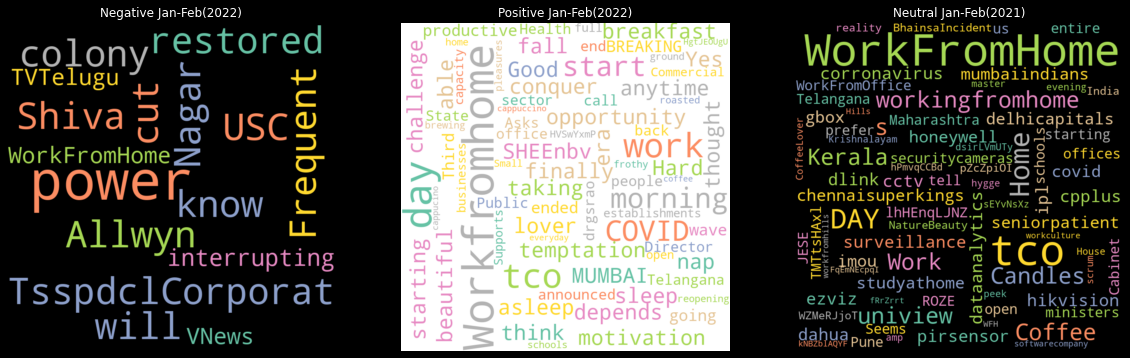

In [36]:
comment_words9 = ''
comment_words10 = ''
comment_words11 = ''
stopwords = set(STOPWORDS)
n=jan22[jan22['labels']=='negative']
p=jan22[jan22['labels']=='positive']
ne=jan22[jan22['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words9 += " ".join(tokens)+" "
 
wordcloud9 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words9)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words10 += " ".join(tokens)+" "
 
wordcloud10 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words10)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words11 += " ".join(tokens)+" "
 
wordcloud11 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words11)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud9, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Jan-Feb(2022)')

ax2.imshow(wordcloud10, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Jan-Feb(2022)')
  
ax3.imshow(wordcloud11, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral Jan-Feb(2021)')
     
plt.show()

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text7 = ' '.join([word for word in comment_words9.split() if word not in (stopwords.words('english'))])
text8 = ' '.join([word for word in comment_words10.split() if word not in (stopwords.words('english'))])
text9 = ' '.join([word for word in comment_words11.split() if word not in (stopwords.words('english'))])
words7=text7.split()
words8=text8.split()
words9=text9.split()
print(len(words7))
print(len(words8))
print(len(words9))

19
94
108


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
word7=[]
for i in range(19):
        word7.append(words7[i])
        
for i in range(len(word7)):
    word7[i] = word7[i].lower()
    
word8=[]
for i in range(94):
        word8.append(words8[i])
        
for i in range(len(word8)):
    word8[i] = word8[i].lower()
    
word9=[]
for i in range(108):
        word9.append(words9[i])
        
for i in range(len(word9)):
    word9[i] = word9[i].lower()
    
word7=np.array(word7)
word8=np.array(word8)
word9=np.array(word9)

(unique7,count7)=np.unique(word7,return_counts=True)
(unique8,count8)=np.unique(word8,return_counts=True)
(unique9,count9)=np.unique(word9,return_counts=True)

data_word7=pd.DataFrame({'words':unique7,'frequency':count7})
data_word8=pd.DataFrame({'words':unique8,'frequency':count8})
data_word9=pd.DataFrame({'words':unique9,'frequency':count9})

df_word_words7=data_word7.sort_values('frequency',ascending=False)
df_word_words8=data_word8.sort_values('frequency',ascending=False)
df_word_words9=data_word9.sort_values('frequency',ascending=False)

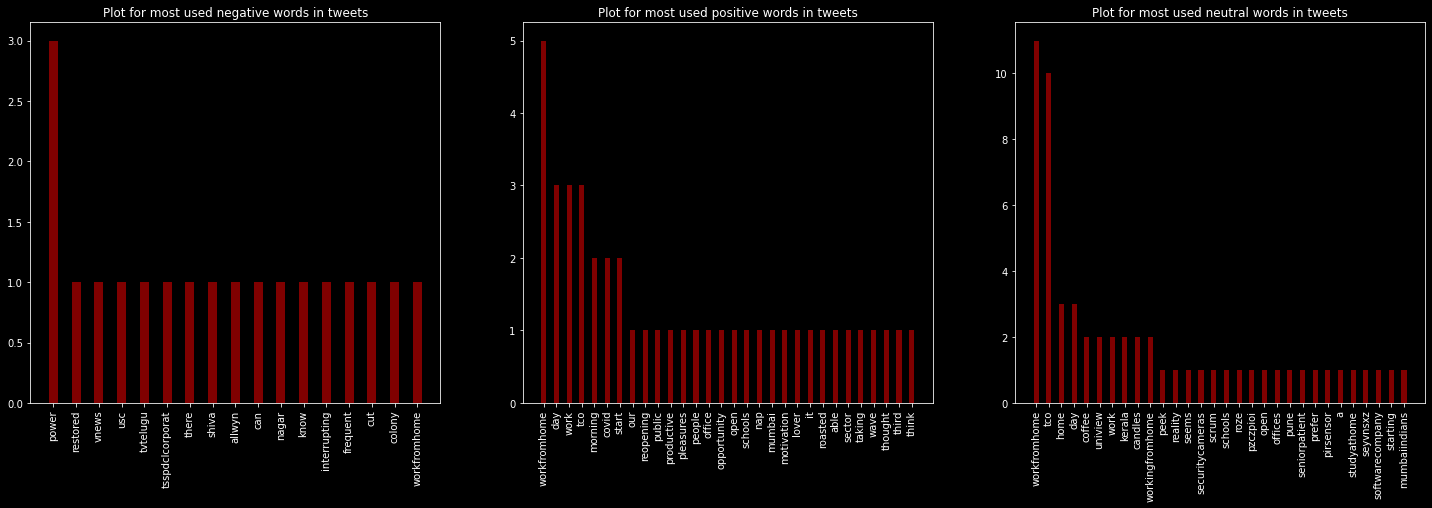

In [39]:
fig,(ax10,ax11,ax12)=plt.subplots(nrows=1,ncols=3,figsize=(25,7)) 
 
ax10.bar(df_word_words7['words'][0:30], df_word_words7['frequency'][0:30], color ='maroon',width = 0.4)
ax10.set_title('Plot for most used negative words in tweets')
ax10.set_xticklabels(df_word_words7['words'][0:30],rotation='vertical',size=10)


ax11.bar(df_word_words8['words'][0:30], df_word_words8['frequency'][0:30], color ='maroon',width = 0.4)
ax11.set_title('Plot for most used positive words in tweets')
ax11.set_xticklabels(df_word_words8['words'][0:30],rotation='vertical',size=10)


ax12.bar(df_word_words9['words'][0:30], df_word_words9['frequency'][0:30], color ='maroon',width = 0.4)
ax12.set_title('Plot for most used neutral words in tweets')
ax12.set_xticklabels(df_word_words9['words'][0:30],rotation='vertical',size=10)

plt.show()

.

## Online Analysis

In [14]:
d11=data_hash[data_hash['hashtag'].str.contains("online")]

In [15]:
d11=d11.sort_values('frequency',ascending=False)
d11=d11.head(30)

In [16]:
fig = px.bar(d11, x='hashtag', y='frequency',
              color='hashtag',
              height=600, width=900)
fig.show()

In [112]:
list1 = ['onlinebusiness','online','makemoneyonline','onlinemarketing','earnmoneyonline','onlinelearning','onlinework','onlinejob''onlinemoney','onlineclasses','onlineshopping','earnonline','onlineearning','onlinemeeting','onlinejobs','onlineclass','onlinetraining','onlineincome','onlinestore','onlinesh']

In [113]:
data1=pd.read_csv('workfromhome_twitter.csv')

In [114]:
online_data = data1[data1['hashtags'].str.contains("online")]
online_data['online_Hashtags'] = data1['hashtags'].str.findall(r"\b"+"|".join(list1)+ r"\b").apply(", ".join)

In [115]:
nan_value = float("NaN")
online_data.replace("", nan_value, inplace=True)

In [116]:
online_data = online_data.dropna().reset_index(drop=False)

In [117]:
online_data['Datetime']=pd.to_datetime(online_data['Datetime'])
online_data['Week']=online_data['Datetime'].dt.to_period('W').astype(str)
online_data['Month']=online_data['Datetime'].dt.to_period('M').astype(str)

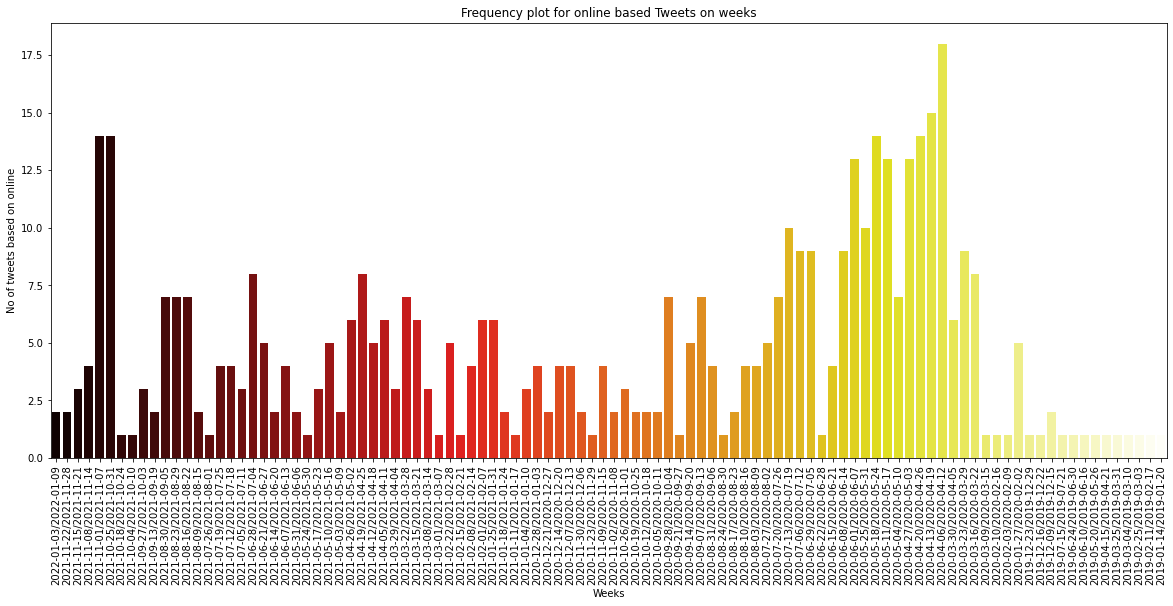

In [126]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Week", data=online_data, palette='hot')
plt.title("Frequency plot for online based Tweets on weeks")
plt.xlabel("Weeks")
plt.ylabel("No of tweets based on online")
plt.xticks(rotation=90)
plt.show()


In [119]:
online_data

level_0  Unnamed: 0  index                  Datetime  \
0         58          58    305 2022-01-08 08:33:19+00:00   
1         82          82    329 2022-01-03 04:20:41+00:00   
2        181         181    428 2021-11-23 19:21:30+00:00   
3        184         184    431 2021-11-22 04:46:44+00:00   
4        190         190    437 2021-11-18 11:05:52+00:00   
..       ...         ...    ...                       ...   
464     9916        9916  10175 2019-03-27 03:52:58+00:00   
465     9927        9927  10186 2019-03-10 17:50:16+00:00   
466     9945        9945  10204 2019-03-01 05:27:08+00:00   
467     9953        9953  10212 2019-02-12 17:36:03+00:00   
468     9966        9966  10225 2019-01-18 22:29:17+00:00   

                Tweet Id                                               Text  \
0    1479732940154163200  #onlinejob #workfromhome #OmicronVariant https...   
1    1477857421376704513  #onlinework #WorkFromHome #Vestingcross https:...   
2    1463226218099081219  Hi friend's\n#entrepreners #business #journey ...   
3    1462643687670702082  Hello guys are you fine\n#entrepreners #busine...   
4    1461289549498253315  DM 'YES' To Start Your Journey....or Whatsapp ...   
..                   ...                                                ...   
464  1110751538157228032  Best MLM Software For Your Multi Level Marketi...   
465  1104801661195710464  @shopper_mb is Hiring For Internship Program!\...   
466  1101353153117614080  Use keywords to get more traffic..!! \nWant Th...   
467  1095375997141114880  We are Hiring Blog Writer, Content Writer, SEO...   
468  1086390095614222337  https://t.co/AM3k3k6SIW \n#money #jobseekers #...   

            Username                location  \
0     affiliatemidhu       Tamil Nadu, India   
1    NikhilB78376658            Mandi, India   
2    SaifulI87612397  Guwahati, Assam, India   
3    SaifulI87612397  Guwahati, Assam, India   
4       Lucifer_0711  Bengaluru South, India   
..               ...                     ...   
464    Creatofuture_           Indore, India   
465        shoppermb                   India   
466   MdHasanHridoy2       Dhaka, Bangladesh   
467        shoppermb                   India   
468   singwithchetan    Greater Noida, India   

                                              hashtags  \
0      ['onlinejob', 'workfromhome', 'OmicronVariant']   
1       ['onlinework', 'WorkFromHome', 'Vestingcross']   
2    ['entrepreners', 'business', 'journey', 'frien...   
3    ['entrepreners', 'business', 'journey', 'frien...   
4    ['startupbusiness', 'earnmoneyonline', 'workfr...   
..                                                 ...   
464  ['Mlm', 'Networkmarketing', 'Entrepreneur', 'W...   
465  ['Fulltime', 'Parttime', 'Remote', 'onlinework...   
466  ['Keywords', 'SEO', 'Blog', 'Website', 'retwee...   
467  ['Hire', 'Hiring', 'Blogger', 'Bloggers', 'wri...   
468  ['money', 'jobseekers', 'WorkFromHome', 'daily...   

                                                 place  \
0    Place(fullName='Tamil Nadu, India', name='Tami...   
1    Place(fullName='Mandi, India', name='Mandi', t...   
2    Place(fullName='Guwahati, India', name='Guwaha...   
3    Place(fullName='Guwahati, India', name='Guwaha...   
4    Place(fullName='Bengaluru South, India', name=...   
..                                                 ...   
464  Place(fullName='Mhow, India', name='Mhow', typ...   
465  Place(fullName='Mumbai, India', name='Mumbai',...   
466  Place(fullName='Dhaka, Bangladesh', name='Dhak...   
467  Place(fullName='Mumbai, India', name='Mumbai',...   
468  Place(fullName='India', name='India', type='co...   

            online_Hashtags                   Week    Month  
0                    online  2022-01-03/2022-01-09  2022-01  
1                    online  2022-01-03/2022-01-09  2022-01  
2    online, onlinebusiness  2021-11-22/2021-11-28  2021-11  
3                    online  2021-11-22/2021-11-28  2021-11  
4           earnmoneyonline  2021-11-15/20

In [120]:
online_data['Text'] =online_data['Text'].str.replace('\d+','')
online_data['Text'] =online_data['Text'].str.replace('.','')
def remove_pattern(input_txt):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt))
    r = re.findall(r"@(w+)", str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)      
    return input_txt
online_data['@_remove'] = np.vectorize(remove_pattern)(online_data['Text'])
online_data['@_remove'][:3]

def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text=re.sub(r'#','',str(text))
    text = re.sub('http[^\s]+','',str(text))
    text=re.sub(r'@[A-Za-z0-9]+','',str(text))
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

online_data['Text']=online_data['Text'].apply(cleanTxt)

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return "positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "negative"
    else :
        return "neutral"

l=[sentiment_scores(i) for i in online_data.Text]
online_data["labels"] = l

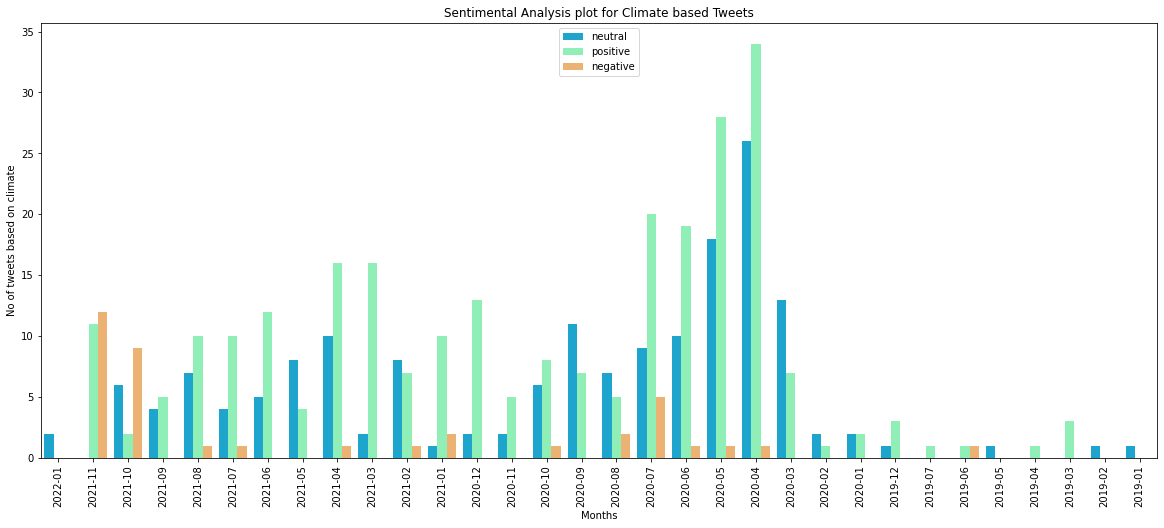

In [123]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Month", hue="labels", data=online_data, palette='rainbow')
plt.legend()
plt.title("Sentimental Analysis plot for Climate based Tweets")
plt.xlabel("Months")
plt.ylabel("No of tweets based on climate")
plt.xticks(rotation=90)
plt.show()

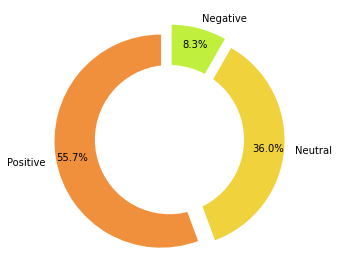

In [125]:
colors = ['#F0903D','#F0D23D','#C0F03D']
explode = (0.08,0.08,0.08)
 
plt.pie(online_data.labels.value_counts(),colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,labels=['Positive','Neutral','Negative'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

**Conclusion:**
- By Doing sentiment analysis for online, we can observe that online platform has a positive feeling among people.
- Due to some distractions there are some negitive reviews.
- By overall analysis we can conclude that for working,shopping,learning,etc..it is better use online mode in this pandemic situation.